<a href="https://colab.research.google.com/github/bernabe-ortega-tenezaca/estructuras_temp/blob/main/TitanicDatos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧪 Ejercicio de Análisis de Datos con el Dataset del Titanic
En este ejercicio, utilizarás pandas, matplotlib, sqlite3, y openpyxl para explorar y visualizar datos.

# 📋 **Instrucciones**

*   Carga un subconjunto del dataset del Titanic.
*   Guarda el dataset como .xlsx.
*   Cárgalo desde una base de datos SQLite.
*   Realiza un análisis descriptivo con pandas.
*   Visualiza los datos con matplotlib.List item

> **Objetivo**: Identificar relaciones entre características como edad, clase y supervivencia.



In [1]:
# Importar librerías necesarias
import pandas as pd
import sqlite3
from io import StringIO
import matplotlib.pyplot as plt

# 🔹 Paso 1: Cargar un subconjunto del dataset Titanic

In [2]:
# Simulamos una pequeña parte del dataset del Titanic
titanic_data = '''Nombre,Edad,Genero,Clase,Superviviente
Allen,29,female,1,1
Braund,22,male,3,0
Cumings,38,female,1,1
Heikkinen,26,female,3,1
Futrelle,35,female,1,0
Moran,,male,3,0
Nasser,21,female,1,1'''

df_titanic = pd.read_csv(StringIO(titanic_data))
df_titanic

,Nombre,Edad,Genero,Clase,Superviviente
0,Allen,29.0,female,1,1
1,Braund,22.0,male,3,0
2,Cumings,38.0,female,1,1
3,Heikkinen,26.0,female,3,1
4,Futrelle,35.0,female,1,0
5,Moran,NaN,male,3,0
6,Nasser,21.0,female,1,1


# 🔹 Paso 2: Guardar y leer como archivo Excel

In [3]:
# Guardamos el DataFrame en formato Excel
df_titanic.to_excel("titanic_pequeno.xlsx", index=False)

# Lo leemos de nuevo para validar que se guardó correctamente
df_excel = pd.read_excel("titanic_pequeno.xlsx")
df_excel

,Nombre,Edad,Genero,Clase,Superviviente
0,Allen,29.0,female,1,1
1,Braund,22.0,male,3,0
2,Cumings,38.0,female,1,1
3,Heikkinen,26.0,female,3,1
4,Futrelle,35.0,female,1,0
5,Moran,NaN,male,3,0
6,Nasser,21.0,female,1,1


# 🔹 Paso 3: Guardar y leer desde una base de datos SQLite

In [4]:
# Conexión a base de datos SQLite en memoria
conn = sqlite3.connect(":memory:")

# Guardamos el DataFrame en la base de datos
df_excel.to_sql("titanic", conn, index=False, if_exists="replace")

# Leemos los datos desde la tabla usando SQL
df_sql = pd.read_sql("SELECT * FROM titanic", conn)
df_sql

,Nombre,Edad,Genero,Clase,Superviviente
0,Allen,29.0,female,1,1
1,Braund,22.0,male,3,0
2,Cumings,38.0,female,1,1
3,Heikkinen,26.0,female,3,1
4,Futrelle,35.0,female,1,0
5,Moran,NaN,male,3,0
6,Nasser,21.0,female,1,1


# 🔹 Paso 4: Análisis con pandas

In [5]:
# Promedio de edad por clase
df_sql.groupby("Clase")["Edad"].mean()

,Edad
Clase,
1,30.75
3,24.00


In [6]:
# Conteo de sobrevivientes por género
df_sql.groupby("Genero")["Superviviente"].sum()

,Superviviente
Genero,
female,4
male,0


# 🔹 Paso 5: Visualización con matplotlib

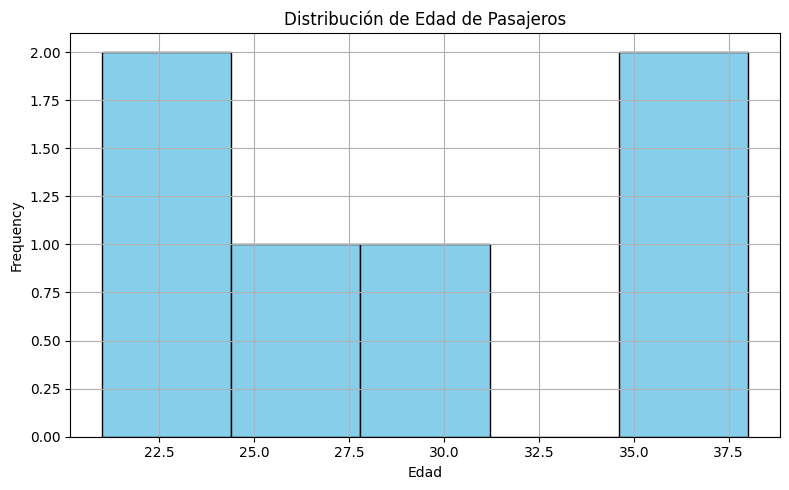

In [7]:
# Histograma de edades
plt.figure(figsize=(8,5))
df_sql["Edad"].dropna().plot(kind='hist', bins=5, color='skyblue', edgecolor='black')
plt.title("Distribución de Edad de Pasajeros")
plt.xlabel("Edad")
plt.grid(True)
plt.tight_layout()
plt.show()

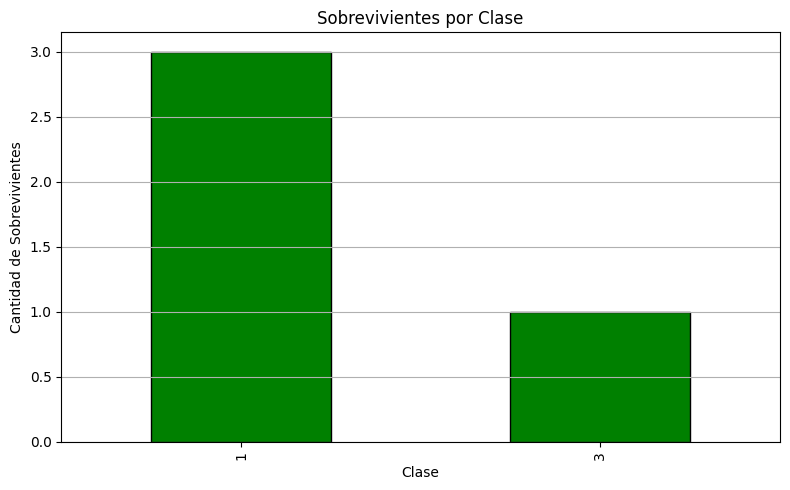

In [8]:
# Gráfico de barras de sobrevivientes por clase
sobrevivientes_clase = df_sql.groupby("Clase")["Superviviente"].sum()

plt.figure(figsize=(8,5))
sobrevivientes_clase.plot(kind='bar', color='green', edgecolor='black')
plt.title("Sobrevivientes por Clase")
plt.xlabel("Clase")
plt.ylabel("Cantidad de Sobrevivientes")
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')